In [2]:
# Importing the required libraries

# Scikit-learn for machine learning models and preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score

# Keras for deep learning models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Scipy for scientific computing
import scipy.stats as stats

# Matplotlib for data visualization
import matplotlib.pyplot as plt


In [3]:
# Load the dataset
final = pd.read_csv("/content/final_dataset.csv")

In [4]:
final.head()

,age_at_cancer_diagnosis,year_of_birth,gender,race,education,mean_education,income,mean_income,copd_count,ardds_count,obesity_count,diabetes_count,hypertension_count,dyslipidemia_count,ibd_count,chronic_liver_disease_count,antiarrhythmics_count,vasodilators_count,statins_count,mace
0,59,1947,F,Other,Q3,34.248889,Q2,69016.42222,0,0,0,0,1,0,0,5,0,0,0,No
1,79,1924,F,Other,Q3,34.248889,Q2,69016.42222,0,0,0,0,0,0,0,0,0,0,0,No
2,81,1928,F,Other,Q3,34.248889,Q2,69016.42222,0,0,0,0,0,0,0,0,0,0,0,No
3,44,1956,F,Other,Q3,34.248889,Q2,69016.42222,0,0,0,0,0,0,0,0,0,0,0,No
4,80,1918,F,Other,Q3,34.248889,Q2,69016.42222,0,0,0,0,2,0,0,0,0,0,0,No


In [5]:
# new data frame copy final to exclude education and income
final2 = final.copy()
final2 = final2.drop(['education', 'income'], axis=1)

In [6]:
final2.head()

,age_at_cancer_diagnosis,year_of_birth,gender,race,mean_education,mean_income,copd_count,ardds_count,obesity_count,diabetes_count,hypertension_count,dyslipidemia_count,ibd_count,chronic_liver_disease_count,antiarrhythmics_count,vasodilators_count,statins_count,mace
0,59,1947,F,Other,34.248889,69016.42222,0,0,0,0,1,0,0,5,0,0,0,No
1,79,1924,F,Other,34.248889,69016.42222,0,0,0,0,0,0,0,0,0,0,0,No
2,81,1928,F,Other,34.248889,69016.42222,0,0,0,0,0,0,0,0,0,0,0,No
3,44,1956,F,Other,34.248889,69016.42222,0,0,0,0,0,0,0,0,0,0,0,No
4,80,1918,F,Other,34.248889,69016.42222,0,0,0,0,2,0,0,0,0,0,0,No


In [7]:
#check column name and data type in final2
final2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28205 entries, 0 to 28204
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age_at_cancer_diagnosis      28205 non-null  int64  
 1   year_of_birth                28205 non-null  int64  
 2   gender                       28205 non-null  object 
 3   race                         28205 non-null  object 
 4   mean_education               28205 non-null  float64
 5   mean_income                  28205 non-null  float64
 6   copd_count                   28205 non-null  int64  
 7   ardds_count                  28205 non-null  int64  
 8   obesity_count                28205 non-null  int64  
 9   diabetes_count               28205 non-null  int64  
 10  hypertension_count           28205 non-null  int64  
 11  dyslipidemia_count           28205 non-null  int64  
 12  ibd_count                    28205 non-null  int64  
 13  chronic_liver_di

In [19]:
!pip install dash
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 18.9 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


In [20]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("Interactive Visualization: Predictors vs. MACE"),
    dcc.Dropdown(
        id='predictor-dropdown',
        options=[{'label': col, 'value': col} for col in final2.columns if col != 'mace'],
        value='age_at_cancer_diagnosis',
        placeholder="Select a predictor"
    ),
    dcc.Graph(id='relationship-graph')
])

# Callback to update the graph based on selected predictor
@app.callback(
    Output('relationship-graph', 'figure'),
    Input('predictor-dropdown', 'value')
)
def update_graph(selected_predictor):
    if pd.api.types.is_numeric_dtype(final2[selected_predictor]):
        # Numeric predictor: show boxplot
        fig = px.box(
            final2,
            x='mace',
            y=selected_predictor,
            color='mace',
            color_discrete_map={'No': '#969696', 'Yes': '#A51417'},
            labels={'mace': 'MACE', selected_predictor: selected_predictor.capitalize()},
            title=f"Distribution of {selected_predictor.capitalize()} by MACE"
        )
    else:
        # Categorical predictor: show bar plot
        fig = px.bar(
            final2.groupby(['mace', selected_predictor]).size().reset_index(name='count'),
            x=selected_predictor,
            y='count',
            color='mace',
            barmode='group',
            color_discrete_map={'No': '#969696', 'Yes': '#A51417'},
            labels={'mace': 'MACE', 'count': 'Count', selected_predictor: selected_predictor.capitalize()},
            title=f"{selected_predictor.capitalize()} by MACE"
        )
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [8]:
import pandas as pd

# Summarize continuous variables (age, education, income, comorbidities, medications)
continuous_columns = ['age_at_cancer_diagnosis', 'year_of_birth','mean_education', 'mean_income',
                      'copd_count', 'ardds_count', 'obesity_count', 'diabetes_count',
                      'hypertension_count', 'dyslipidemia_count', 'ibd_count',
                      'chronic_liver_disease_count', 'antiarrhythmics_count', 'vasodilators_count', 'statins_count']

# Group by MACE status for continuous variables
continuous_summary = final2.groupby('mace')[continuous_columns].describe()

# Flatten multi-level column index and select mean and std
continuous_summary.columns = ['_'.join(col) for col in continuous_summary.columns]
mean_cols = ['{}_mean'.format(col) for col in continuous_columns]
std_cols = ['{}_std'.format(col) for col in continuous_columns]

# Create a new dataframe combining mean and std in the format 'mean (std)'
combined_summary = pd.DataFrame()

for col in continuous_columns:
    mean_values = continuous_summary[f'{col}_mean'].round(1)
    std_values = continuous_summary[f'{col}_std'].round(1)
    combined_summary[col] = mean_values.astype(str) + ' (' + std_values.astype(str) + ')'

# Display the combined summary
print("Continuous Variables Summary by MACE Status (mean (std)):")
print(combined_summary)

# Summarize categorical variables (gender, race)
categorical_summary = pd.DataFrame()

# Group by MACE status for categorical variables, excluding MACE from summary
for col in ['gender', 'race']:
    counts = final2.groupby('mace')[col].value_counts()
    percentages = final2.groupby('mace')[col].value_counts(normalize=True) * 100
    cat_summary = pd.DataFrame({'Count': counts, 'Percentage (%)': percentages}).reset_index()
    cat_summary = cat_summary.rename(columns={'index': col})
    categorical_summary = pd.concat([categorical_summary, cat_summary], axis=0)

# Display the categorical summary
print("\nCategorical Variables Summary by MACE Status:")
print(categorical_summary)

Continuous Variables Summary by MACE Status (mean (std)):
     age_at_cancer_diagnosis  year_of_birth mean_education        mean_income  \
mace                                                                            
No               64.7 (13.7)  1945.9 (16.0)     23.8 (9.5)  69196.9 (13624.6)   
Yes              69.0 (11.1)  1942.0 (13.2)     25.2 (9.6)  70406.9 (12430.0)   

     copd_count ardds_count obesity_count diabetes_count hypertension_count  \
mace                                                                          
No    0.6 (5.3)   0.7 (7.4)     0.4 (3.0)     2.0 (13.6)         2.9 (10.6)   
Yes   1.3 (9.9)   0.7 (6.2)     0.6 (2.9)     4.7 (26.4)         7.0 (19.3)   

     dyslipidemia_count  ibd_count chronic_liver_disease_count  \
mace                                                             
No            1.3 (6.5)  0.3 (6.9)                  3.2 (17.7)   
Yes          4.4 (14.1)  0.5 (8.3)                  4.0 (19.1)   

     antiarrhythmics_count vasodila

In [9]:
from sklearn.preprocessing import StandardScaler

def onehotify(dfin, colin):
    return pd.concat([dfin, pd.get_dummies(dfin[colin], prefix=colin)], axis=1).drop([colin], axis=1)

# Create a copy of final2 as final3
final3 = final2.copy()

# List of continuous variables that should be normalized
continuous_vars = ['age_at_cancer_diagnosis', 'year_of_birth', 'mean_education', 'mean_income',
                   'copd_count', 'ardds_count', 'obesity_count', 'diabetes_count', 'hypertension_count',
                   'dyslipidemia_count', 'ibd_count', 'chronic_liver_disease_count', 'antiarrhythmics_count',
                   'vasodilators_count', 'statins_count']

# Normalize continuous variables using StandardScaler
scaler = StandardScaler()
final3[continuous_vars] = scaler.fit_transform(final3[continuous_vars])

# Create dummy variables for categorical variables using onehotify
categorical_vars = ['gender', 'race']
for curcol in categorical_vars:
    final3 = onehotify(final3, curcol)

# View the first few rows of the new dataset
final3.head()

,age_at_cancer_diagnosis,year_of_birth,mean_education,mean_income,copd_count,ardds_count,obesity_count,diabetes_count,hypertension_count,dyslipidemia_count,...,antiarrhythmics_count,vasodilators_count,statins_count,mace,gender_F,gender_M,race_Asian,race_Black,race_Other,race_White
0,-0.439673,0.086457,1.095076,-0.019497,-0.10525,-0.10041,-0.150875,-0.149168,-0.187002,-0.209965,...,-0.131382,-0.072769,-0.221581,No,True,False,False,False,True,False
1,1.028567,-1.364099,1.095076,-0.019497,-0.10525,-0.10041,-0.150875,-0.149168,-0.274219,-0.209965,...,-0.131382,-0.072769,-0.221581,No,True,False,False,False,True,False
2,1.175391,-1.111829,1.095076,-0.019497,-0.10525,-0.10041,-0.150875,-0.149168,-0.274219,-0.209965,...,-0.131382,-0.072769,-0.221581,No,True,False,False,False,True,False
3,-1.540853,0.654066,1.095076,-0.019497,-0.10525,-0.10041,-0.150875,-0.149168,-0.274219,-0.209965,...,-0.131382,-0.072769,-0.221581,No,True,False,False,False,True,False
4,1.101979,-1.742505,1.095076,-0.019497,-0.10525,-0.10041,-0.150875,-0.149168,-0.099786,-0.209965,...,-0.131382,-0.072769,-0.221581,No,True,False,False,False,True,False


In [10]:
final3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28205 entries, 0 to 28204
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age_at_cancer_diagnosis      28205 non-null  float64
 1   year_of_birth                28205 non-null  float64
 2   mean_education               28205 non-null  float64
 3   mean_income                  28205 non-null  float64
 4   copd_count                   28205 non-null  float64
 5   ardds_count                  28205 non-null  float64
 6   obesity_count                28205 non-null  float64
 7   diabetes_count               28205 non-null  float64
 8   hypertension_count           28205 non-null  float64
 9   dyslipidemia_count           28205 non-null  float64
 10  ibd_count                    28205 non-null  float64
 11  chronic_liver_disease_count  28205 non-null  float64
 12  antiarrhythmics_count        28205 non-null  float64
 13  vasodilators_cou

In [11]:
final4 = final3.copy()

# Convert boolean columns to 0 and 1
final4[['gender_F', 'gender_M', 'race_Asian', 'race_Black', 'race_Other', 'race_White']] = \
    final4[['gender_F', 'gender_M', 'race_Asian', 'race_Black', 'race_Other', 'race_White']].astype(int)

# View the first few rows of the updated dataset
final4.head()

,age_at_cancer_diagnosis,year_of_birth,mean_education,mean_income,copd_count,ardds_count,obesity_count,diabetes_count,hypertension_count,dyslipidemia_count,...,antiarrhythmics_count,vasodilators_count,statins_count,mace,gender_F,gender_M,race_Asian,race_Black,race_Other,race_White
0,-0.439673,0.086457,1.095076,-0.019497,-0.10525,-0.10041,-0.150875,-0.149168,-0.187002,-0.209965,...,-0.131382,-0.072769,-0.221581,No,1,0,0,0,1,0
1,1.028567,-1.364099,1.095076,-0.019497,-0.10525,-0.10041,-0.150875,-0.149168,-0.274219,-0.209965,...,-0.131382,-0.072769,-0.221581,No,1,0,0,0,1,0
2,1.175391,-1.111829,1.095076,-0.019497,-0.10525,-0.10041,-0.150875,-0.149168,-0.274219,-0.209965,...,-0.131382,-0.072769,-0.221581,No,1,0,0,0,1,0
3,-1.540853,0.654066,1.095076,-0.019497,-0.10525,-0.10041,-0.150875,-0.149168,-0.274219,-0.209965,...,-0.131382,-0.072769,-0.221581,No,1,0,0,0,1,0
4,1.101979,-1.742505,1.095076,-0.019497,-0.10525,-0.10041,-0.150875,-0.149168,-0.099786,-0.209965,...,-0.131382,-0.072769,-0.221581,No,1,0,0,0,1,0


In [21]:
final4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28205 entries, 0 to 28204
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age_at_cancer_diagnosis      28205 non-null  float64
 1   year_of_birth                28205 non-null  float64
 2   mean_education               28205 non-null  float64
 3   mean_income                  28205 non-null  float64
 4   copd_count                   28205 non-null  float64
 5   ardds_count                  28205 non-null  float64
 6   obesity_count                28205 non-null  float64
 7   diabetes_count               28205 non-null  float64
 8   hypertension_count           28205 non-null  float64
 9   dyslipidemia_count           28205 non-null  float64
 10  ibd_count                    28205 non-null  float64
 11  chronic_liver_disease_count  28205 non-null  float64
 12  antiarrhythmics_count        28205 non-null  float64
 13  vasodilators_cou

In [12]:
X = final4.drop(columns=['mace'])  # Features (all columns except 'mace')
y = final4['mace']  # Target (mace)

# Convert 'mace' to binary (0 for 'No' and 1 for 'Yes')
y = y.map({'No': 0, 'Yes': 1})

# Define cross-validation (StratifiedKFold ensures class balance in each fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=729)

smote = SMOTEENN(sampling_strategy='auto', random_state=729)

Logistic regression

In [ ]:
# Hyperparameter grid for Logistic Regression
lr_param_grid = {
    'penalty': ['l1', 'l2'],  # L1 and L2 regularization
    'C': np.logspace(0, 4, 10)  # Inverse of regularization strength, logarithmic scale
}

# Initialize Logistic Regression
log_reg = LogisticRegression(random_state=729, solver='liblinear')  # 'liblinear' for L1 and L2 support

# Grid search for Logistic Regression
log_reg_grid = GridSearchCV(estimator=log_reg, param_grid=lr_param_grid, cv=cv, scoring='roc_auc')
log_reg_grid.fit(X, y)
best_log_reg = log_reg_grid.best_estimator_

# Print best parameters for Logistic Regression
print("Best Logistic Regression parameters:", log_reg_grid.best_params_)

Best Logistic Regression parameters: {'C': 2.7825594022071245, 'penalty': 'l1'}


Logistic Regression - Mean AUC: 0.6896
Logistic Regression - Mean Accuracy: 0.5461
Logistic Regression - Mean Sensitivity: 0.7262
Logistic Regression - Mean Specificity: 0.1034
Logistic Regression - Mean Precision: 0.1034
Logistic Regression - Mean F1 Score: 0.1811


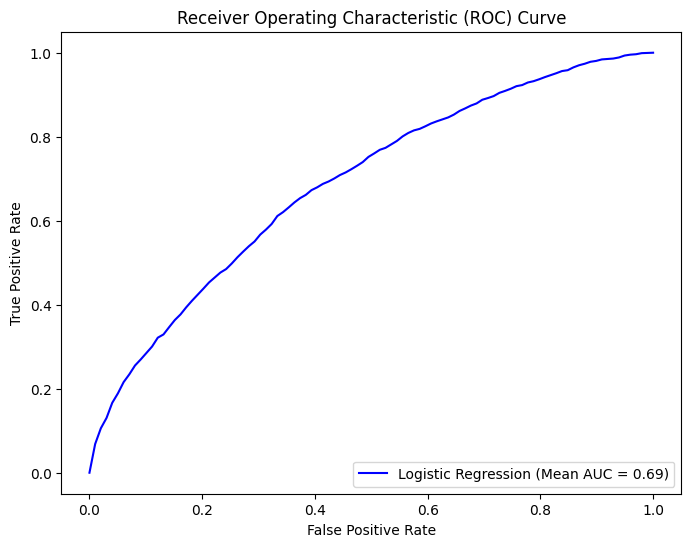

In [13]:
# Initialize Logistic Regression model with best parameters
log_reg = LogisticRegression(C=2.7825594022071245, penalty='l1',solver='liblinear', random_state=729)

# Initialize lists to store metrics and ROC data
all_fpr = np.linspace(0, 1, 100)
mean_log_reg_tpr = np.zeros_like(all_fpr)

log_reg_accuracy = []
log_reg_sensitivity = []
log_reg_specificity = []
log_reg_precision = []
log_reg_f1 = []
log_reg_roc_auc = []

# Cross-validation loop
for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    # Split the data into train and test sets
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Apply SMOTE to balance training data
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Train the logistic regression model
    log_reg.fit(X_train_smote, y_train_smote)

    # Predict on the test data
    log_reg_pred = log_reg.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, log_reg_pred)
    sensitivity = recall_score(y_test, log_reg_pred)
    specificity = (confusion_matrix(y_test, log_reg_pred)[1][1] /
                   (confusion_matrix(y_test, log_reg_pred)[0][1] + confusion_matrix(y_test, log_reg_pred)[1][1]))
    precision = precision_score(y_test, log_reg_pred)
    f1 = f1_score(y_test, log_reg_pred)

    # Calculate ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)

    # Interpolate to align curves and calculate mean TPR
    mean_log_reg_tpr += np.interp(all_fpr, fpr, tpr)

    # Append metrics
    log_reg_accuracy.append(accuracy)
    log_reg_sensitivity.append(sensitivity)
    log_reg_specificity.append(specificity)
    log_reg_precision.append(precision)
    log_reg_f1.append(f1)
    log_reg_roc_auc.append(roc_auc)

# Calculate mean metrics across folds for Logistic Regression
mean_log_reg_accuracy = np.mean(log_reg_accuracy)
mean_log_reg_sensitivity = np.mean(log_reg_sensitivity)
mean_log_reg_specificity = np.mean(log_reg_specificity)
mean_log_reg_precision = np.mean(log_reg_precision)
mean_log_reg_f1 = np.mean(log_reg_f1)
mean_log_reg_roc_auc = np.mean(log_reg_roc_auc)

# Print overall results for Logistic Regression
print(f"Logistic Regression - Mean AUC: {mean_log_reg_roc_auc:.4f}")
print(f"Logistic Regression - Mean Accuracy: {mean_log_reg_accuracy:.4f}")
print(f"Logistic Regression - Mean Sensitivity: {mean_log_reg_sensitivity:.4f}")
print(f"Logistic Regression - Mean Specificity: {mean_log_reg_specificity:.4f}")
print(f"Logistic Regression - Mean Precision: {mean_log_reg_precision:.4f}")
print(f"Logistic Regression - Mean F1 Score: {mean_log_reg_f1:.4f}")

# Average the TPR values across folds and plot ROC curve
mean_log_reg_tpr /= cv.get_n_splits()
plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_log_reg_tpr, color='b', label=f'Logistic Regression (Mean AUC = {mean_log_reg_roc_auc:.2f})')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

Random Forest

In [ ]:
# Hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 500, 700],  # Number of trees
    'max_features': ['auto', 'sqrt', 'log2']  # Max features for the best split
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=729)

# Grid search for Random Forest
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=cv, scoring='roc_auc')
rf_grid.fit(X, y)
best_rf = rf_grid.best_estimator_

# Print best parameters for Random Forest
print("Best Random Forest parameters:", rf_grid.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Best Random Forest parameters: {'max_features': 'sqrt', 'n_estimators': 500}


Random Forest - Mean AUC: 0.6938
Random Forest - Mean Accuracy: 0.8373
Random Forest - Mean Sensitivity: 0.3405
Random Forest - Mean Specificity: 0.1675
Random Forest - Mean Precision: 0.1675
Random Forest - Mean F1 Score: 0.2245


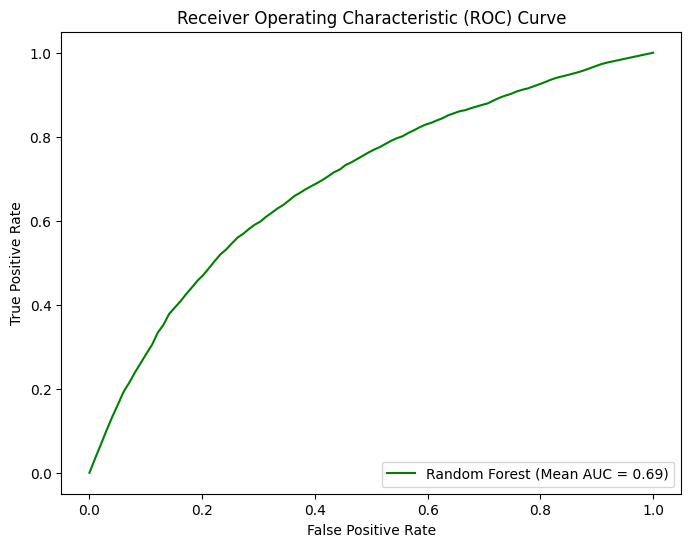

In [14]:
# Initialize Random Forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=729, n_estimators=500, max_features='sqrt')

# Initialize lists to store fpr and tpr for each fold
all_fpr = np.linspace(0, 1, 100)  # Fixed range for FPR
mean_rf_tpr = np.zeros_like(all_fpr)  # Initialize array for mean TPR

# Initialize lists to store metrics
rf_accuracy = []
rf_sensitivity = []
rf_specificity = []
rf_precision = []
rf_f1 = []
rf_roc_auc = []

# Cross-validation loop
for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    # Split the data into train and test
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Apply SMOTE on the training data
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Train the random forest model
    rf_model.fit(X_train_smote, y_train_smote)

    # Predict on the test data
    rf_pred = rf_model.predict(X_test)

    # Evaluate the model performance
    accuracy = accuracy_score(y_test, rf_pred)
    sensitivity = recall_score(y_test, rf_pred)
    specificity = (confusion_matrix(y_test, rf_pred)[1][1] /
                   (confusion_matrix(y_test, rf_pred)[0][1] + confusion_matrix(y_test, rf_pred)[1][1]))
    precision = precision_score(y_test, rf_pred)
    f1 = f1_score(y_test, rf_pred)

    # Calculate ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Interpolate to make sure all curves have the same number of points
    mean_rf_tpr += np.interp(all_fpr, fpr, tpr)

    # Append metrics
    rf_accuracy.append(accuracy)
    rf_sensitivity.append(sensitivity)
    rf_specificity.append(specificity)
    rf_precision.append(precision)
    rf_f1.append(f1)
    rf_roc_auc.append(roc_auc)

# Calculate mean of the metrics across the folds for Random Forest
mean_rf_accuracy = np.mean(rf_accuracy)
mean_rf_sensitivity = np.mean(rf_sensitivity)
mean_rf_specificity = np.mean(rf_specificity)
mean_rf_precision = np.mean(rf_precision)
mean_rf_f1 = np.mean(rf_f1)
mean_rf_roc_auc = np.mean(rf_roc_auc)

# Print overall results for Random Forest
print(f"Random Forest - Mean AUC: {mean_rf_roc_auc:.4f}")
print(f"Random Forest - Mean Accuracy: {mean_rf_accuracy:.4f}")
print(f"Random Forest - Mean Sensitivity: {mean_rf_sensitivity:.4f}")
print(f"Random Forest - Mean Specificity: {mean_rf_specificity:.4f}")
print(f"Random Forest - Mean Precision: {mean_rf_precision:.4f}")
print(f"Random Forest - Mean F1 Score: {mean_rf_f1:.4f}")

# Average the TPR values across folds
mean_rf_tpr /= cv.get_n_splits()

# Plot the ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_rf_tpr, color='g', label=f'Random Forest (Mean AUC = {mean_rf_roc_auc:.2f})')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

DNN

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
DNN - Mean AUC: 0.7910
DNN - Mean Accuracy: 0.7552
DNN - Mean Sensitivity: 0.6538
DNN - Mean Specificity: 0.1712
DNN - Mean Precision: 0.1712
DNN - Mean F1 Score: 0.2708


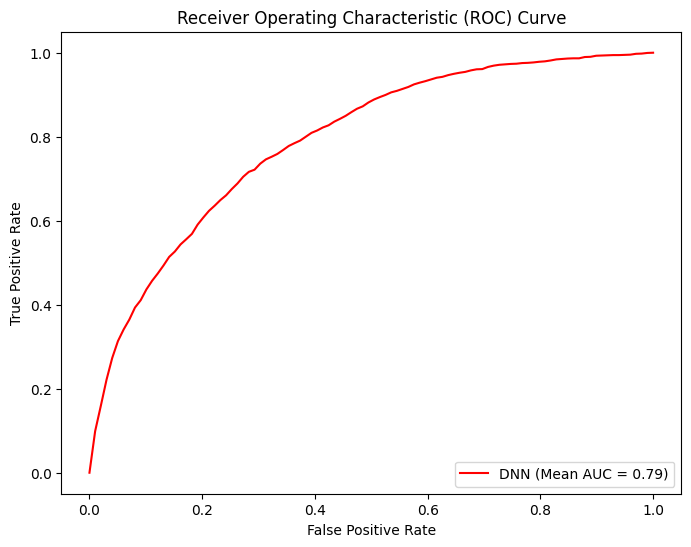

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Initialize DNN model
dnn_model = Sequential()

# Add layers to the model
dnn_model.add(Dense(256, input_dim=X_train_smote.shape[1], activation='relu'))  # First hidden layer
dnn_model.add(Dense(256, activation='relu'))  # Second hidden layer
dnn_model.add(Dense(128, activation='relu'))  # Third hidden layer
dnn_model.add(Dense(64, activation='relu'))  # Fourth hidden layer
dnn_model.add(Dense(32, activation='relu'))  # Fifth hidden layer
dnn_model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
dnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting (monitor 'val_loss' instead of 'loss')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Initialize lists to store fpr and tpr for each fold
all_fpr = np.linspace(0, 1, 100)  # Fixed range for FPR
mean_dnn_tpr = np.zeros_like(all_fpr)  # Initialize array for mean TPR

# Initialize lists to store metrics
dnn_accuracy = []
dnn_sensitivity = []
dnn_specificity = []
dnn_precision = []
dnn_f1 = []
dnn_roc_auc = []

# Cross-validation loop with StratifiedKFold
cv = StratifiedKFold(n_splits=5)  # Example with 5 splits
for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    # Split the data into train and test
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Apply SMOTE on the training data
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Split training data into further train and validation sets for early stopping
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

    # Train the DNN model with early stopping
    dnn_model.fit(X_train_split, y_train_split, epochs=50, batch_size=64, verbose=0,
                  validation_data=(X_val_split, y_val_split), callbacks=[early_stopping])

    # Predict on the test data
    dnn_pred = (dnn_model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions

    # Evaluate the model performance
    accuracy = accuracy_score(y_test, dnn_pred)
    sensitivity = recall_score(y_test, dnn_pred)
    specificity = (confusion_matrix(y_test, dnn_pred)[1][1] /
                   (confusion_matrix(y_test, dnn_pred)[0][1] + confusion_matrix(y_test, dnn_pred)[1][1]))
    precision = precision_score(y_test, dnn_pred)
    f1 = f1_score(y_test, dnn_pred)

    # Calculate ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, dnn_model.predict(X_test).ravel())  # Use .predict() and flatten the result
    roc_auc = auc(fpr, tpr)

    # Interpolate to make sure all curves have the same number of points
    mean_dnn_tpr += np.interp(all_fpr, fpr, tpr)

    # Append metrics
    dnn_accuracy.append(accuracy)
    dnn_sensitivity.append(sensitivity)
    dnn_specificity.append(specificity)
    dnn_precision.append(precision)
    dnn_f1.append(f1)
    dnn_roc_auc.append(roc_auc)

# Calculate mean of the metrics across the folds for DNN
mean_dnn_accuracy = np.mean(dnn_accuracy)
mean_dnn_sensitivity = np.mean(dnn_sensitivity)
mean_dnn_specificity = np.mean(dnn_specificity)
mean_dnn_precision = np.mean(dnn_precision)
mean_dnn_f1 = np.mean(dnn_f1)
mean_dnn_roc_auc = np.mean(dnn_roc_auc)

# Print overall results for DNN
print(f"DNN - Mean AUC: {mean_dnn_roc_auc:.4f}")
print(f"DNN - Mean Accuracy: {mean_dnn_accuracy:.4f}")
print(f"DNN - Mean Sensitivity: {mean_dnn_sensitivity:.4f}")
print(f"DNN - Mean Specificity: {mean_dnn_specificity:.4f}")
print(f"DNN - Mean Precision: {mean_dnn_precision:.4f}")
print(f"DNN - Mean F1 Score: {mean_dnn_f1:.4f}")

# Average the TPR values across folds
mean_dnn_tpr /= cv.get_n_splits()

# Plot the ROC curve for DNN
plt.figure(figsize=(8, 6))
plt.plot(all_fpr, mean_dnn_tpr, color='r', label=f'DNN (Mean AUC = {mean_dnn_roc_auc:.2f})')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin

# Custom wrapper class for Keras model
class KerasClassifierCustom(BaseEstimator, ClassifierMixin):
    def __init__(self, hidden_layers=4, hidden_dim=128, epochs=50, batch_size=128):
        self.hidden_layers = hidden_layers
        self.hidden_dim = hidden_dim
        self.epochs = epochs
        self.batch_size = batch_size

    def create_model(self):
        # Create the DNN model
        model = Sequential()
        model.add(Dense(self.hidden_dim, input_dim=X.shape[1], activation='relu'))  # Input layer + 1st hidden layer
        for _ in range(self.hidden_layers - 1):
            model.add(Dense(self.hidden_dim, activation='relu'))  # Hidden layers
        model.add(Dense(1, activation='sigmoid'))  # Output layer
        model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model = self.create_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")  # Predict binary classes

# Define the parameter grid for GridSearch
param_grid = {
    'hidden_layers': [2, 4, 6, 8],  # Number of hidden layers
    'hidden_dim': [128, 256],  # Dimension of hidden layers
    'batch_size': [64, 128, 512],  # Batch size
    'epochs': [10, 50]  # Number of epochs
}

# Initialize the custom Keras model wrapper
keras_model = KerasClassifierCustom()

# Initialize GridSearchCV with the custom model wrapper
grid_search = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=5, scoring='roc_auc')

# Fit the model to data (X, y)
grid_search.fit(X, y)

# Print best parameters
print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py"

KeyboardInterrupt: 

In [ ]:
!python --version

Python 3.10.12


ROC curve

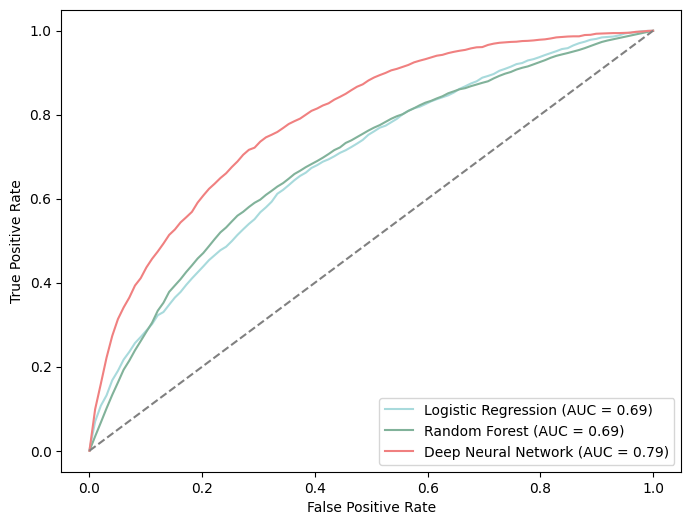

In [22]:
plt.figure(figsize=(8, 6))

# Plot ROC curves for each model
plt.plot(all_fpr, mean_log_reg_tpr, color='#a8dadc', label=f'Logistic Regression (AUC = {mean_log_reg_roc_auc:.2f})')
plt.plot(all_fpr, mean_rf_tpr, color='#81b29a', label=f'Random Forest (AUC = {mean_rf_roc_auc:.2f})')
plt.plot(all_fpr, mean_dnn_tpr, color='#f08080', label=f'Deep Neural Network (AUC = {mean_dnn_roc_auc:.2f})')

# Adding a dotted line for ROC = 0.5 (Random Classifier Line)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Adding titles and labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(False)

# Save the plot as an image file (e.g., 'roc_curve_comparison.png')
plt.savefig('roc_curve_comparison.png', format='png', dpi=300)

# Show the plot
plt.show()

Feature Importance

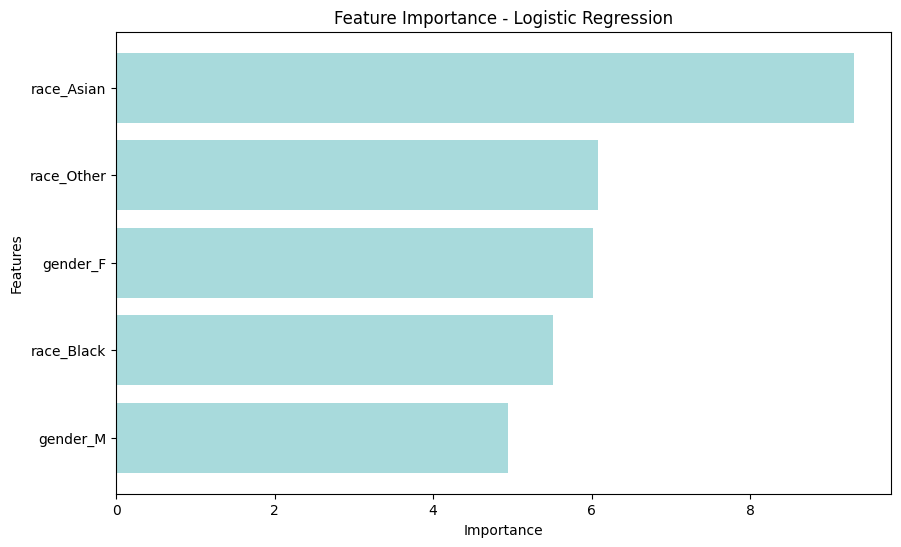

In [46]:
# Extract coefficients and their absolute values
log_reg_feature_importance = np.abs(log_reg.coef_[0])

# Create a DataFrame with feature names and their importance
log_reg_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': log_reg_feature_importance
})

# Sort the importance values in descending order
log_reg_importance_df = log_reg_importance_df.sort_values(by='Importance', ascending=False)
top_10_features_log_reg = log_reg_importance_df.head(5)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_10_features_log_reg['Feature'], top_10_features_log_reg['Importance'], color='#a8dadc')
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # To display the most important features on top


plt.savefig('feature_importance_log_reg.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

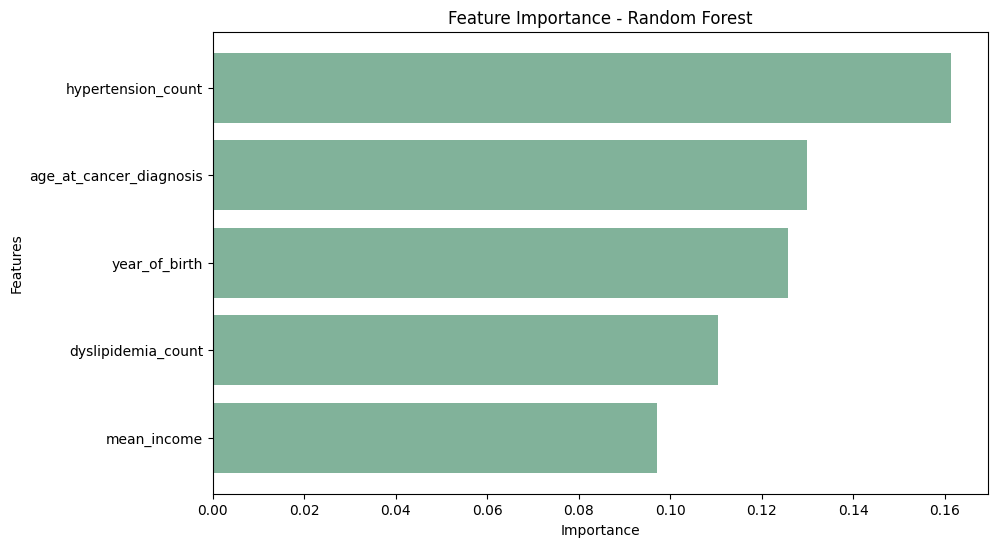

In [47]:
# Extract feature importances
rf_feature_importance = rf_model.feature_importances_

# Create a DataFrame with feature names and their importance
rf_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_feature_importance
})

# Sort the importance values in descending order
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)
top_10_features_rf = rf_importance_df.head(5)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_10_features_rf['Feature'], top_10_features_rf['Importance'], color='#81b29a')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # To display the most important features on top

plt.savefig('feature_importance_rf.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


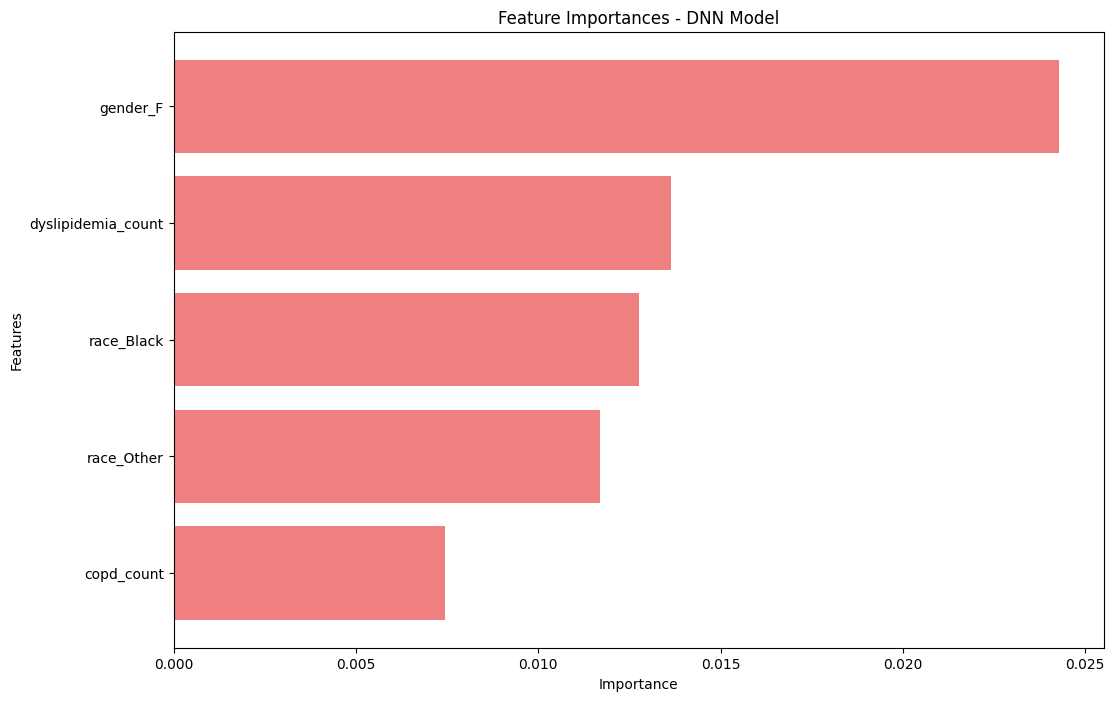

In [48]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Baseline accuracy with the original test set
baseline_accuracy = accuracy_score(y_test, (dnn_model.predict(X_test) > 0.5).astype("int32"))

# Initialize a list to store permutation importances
feature_importances = []

# Loop through each feature to shuffle and calculate importance
for col in X_test.columns:
    X_test_permuted = X_test.copy()  # Copy the test set
    X_test_permuted[col] = np.random.permutation(X_test_permuted[col])  # Shuffle one column

    # Predict with the permuted test set
    permuted_accuracy = accuracy_score(y_test, (dnn_model.predict(X_test_permuted) > 0.5).astype("int32"))

    # Importance is the drop in accuracy from the baseline
    importance = baseline_accuracy - permuted_accuracy
    feature_importances.append(importance)

# Create a DataFrame to hold the feature names and their importance scores
dnn_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

top_10_features_dnn = dnn_importance_df.head(5)

# Plot all features sorted by importance in descending order
plt.figure(figsize=(12, 8))
plt.barh(top_10_features_dnn['Feature'], top_10_features_dnn['Importance'], color='#f08080')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances - DNN Model')
plt.gca().invert_yaxis()  # Display the most important features at the top

plt.savefig('feature_importance_dnn.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

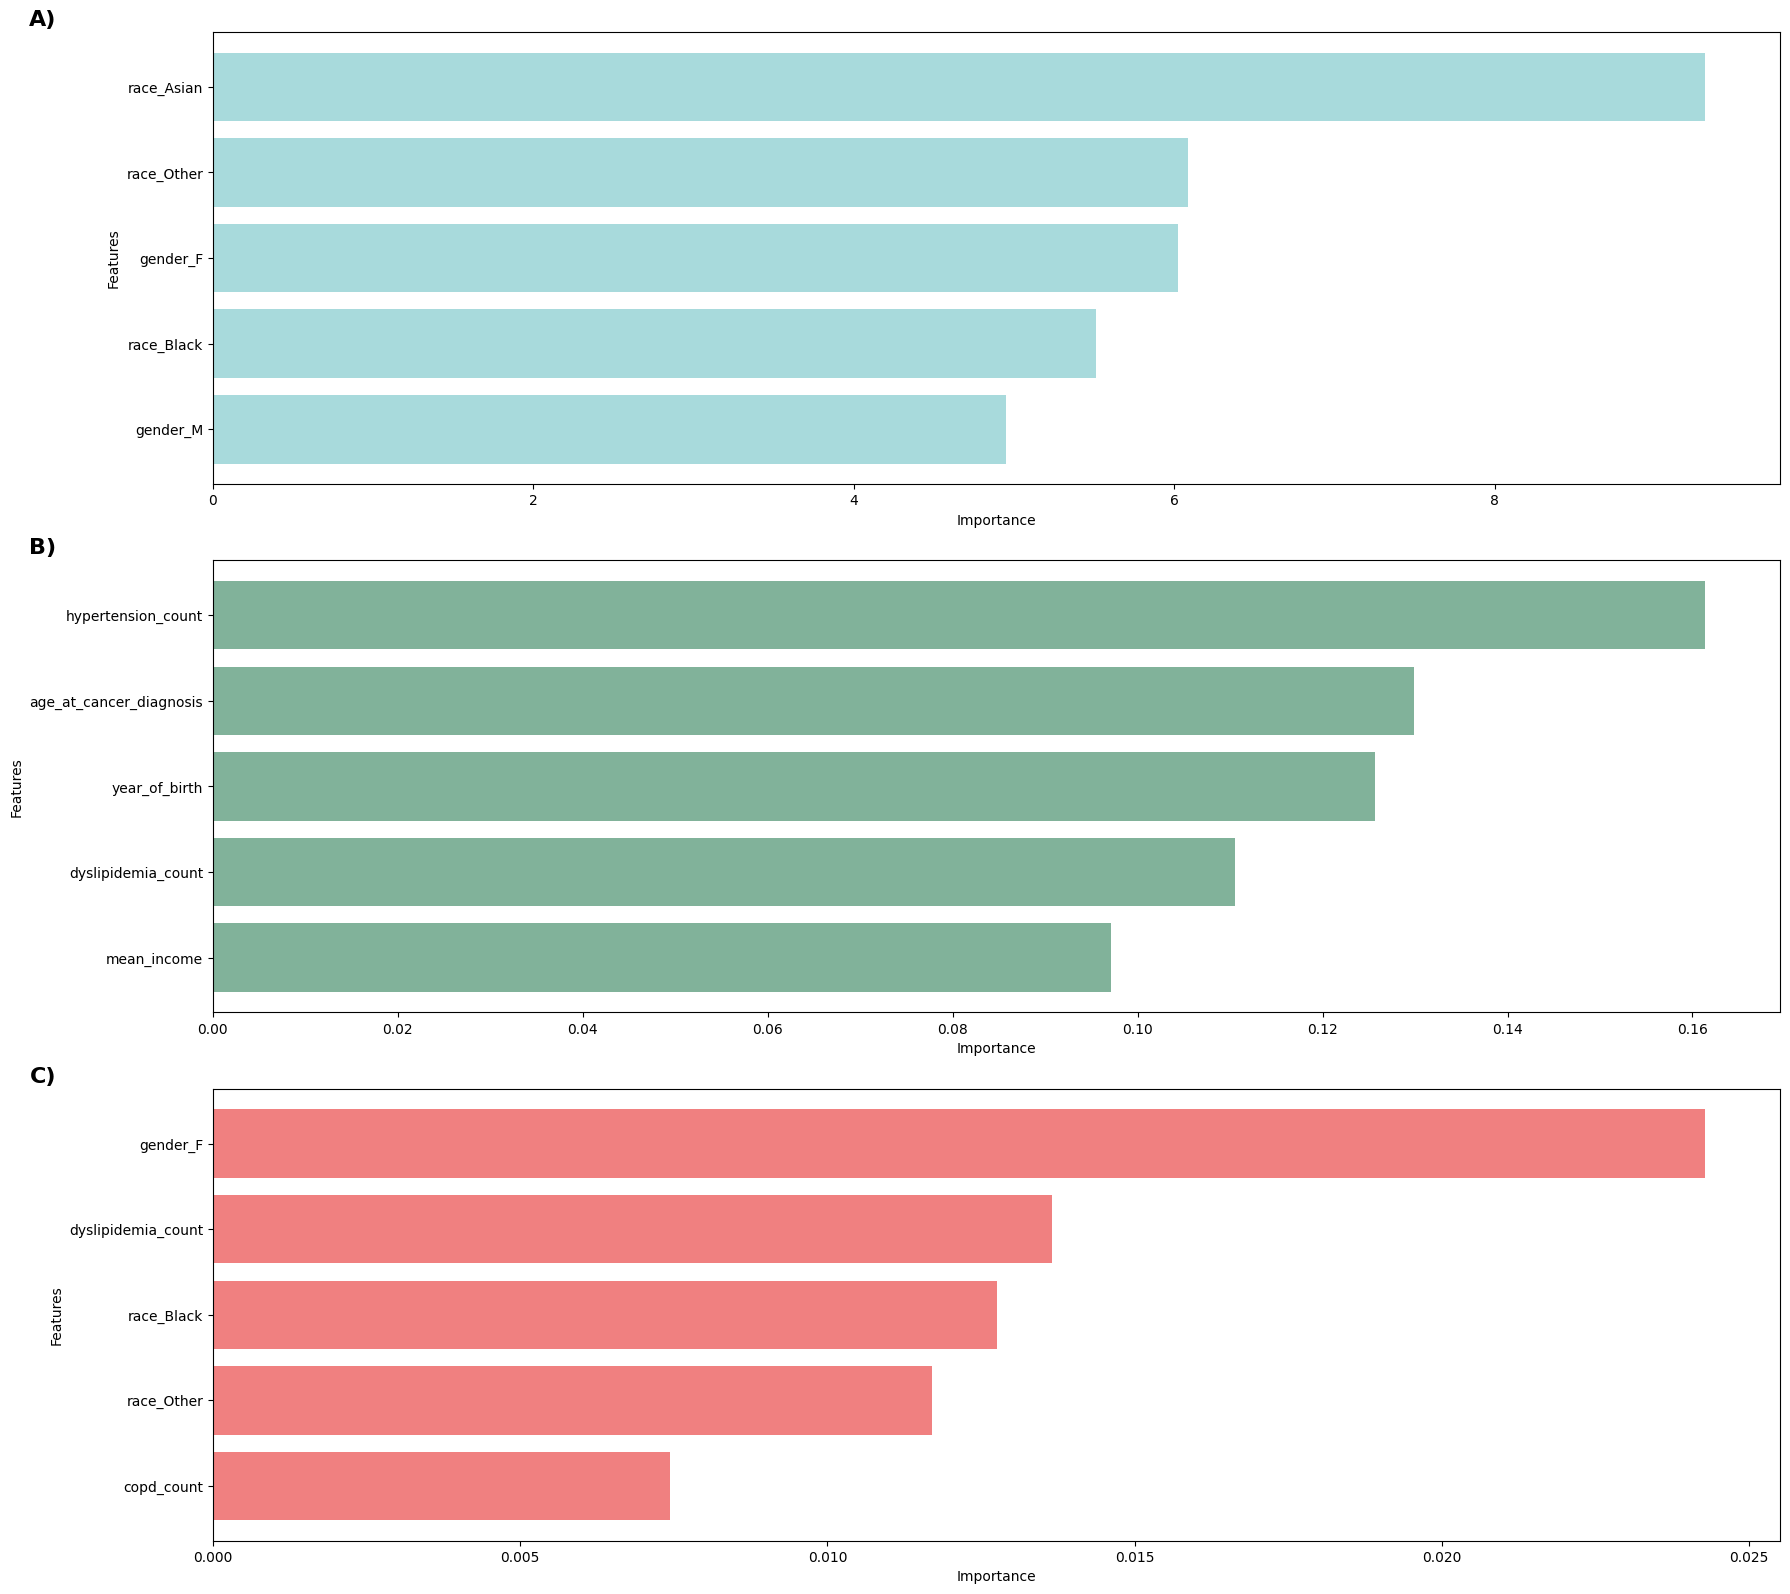

In [49]:
import matplotlib.pyplot as plt

# Create a figure for the combined plots
fig = plt.figure(figsize=(18, 16))

# First subplot: Logistic Regression
ax1 = fig.add_subplot(3, 1, 1)
ax1.barh(top_10_features_log_reg['Feature'], top_10_features_log_reg['Importance'], color='#a8dadc')
ax1.set_xlabel('Importance')
ax1.set_ylabel('Features')
ax1.invert_yaxis()  # Display the most important features on top
ax1.text(-0.1, 1.05, "A)", transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

# Second subplot: Random Forest
ax2 = fig.add_subplot(3, 1, 2)
ax2.barh(top_10_features_rf['Feature'], top_10_features_rf['Importance'], color='#81b29a')
ax2.set_xlabel('Importance')
ax2.set_ylabel('Features')
ax2.invert_yaxis()  # Display the most important features on top
ax2.text(-0.1, 1.05, "B)", transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

# Third subplot: DNN Model
ax3 = fig.add_subplot(3, 1, 3)
ax3.barh(top_10_features_dnn['Feature'], top_10_features_dnn['Importance'], color='#f08080')
ax3.set_xlabel('Importance')
ax3.set_ylabel('Features')
ax3.invert_yaxis()  # Display the most important features on top
ax3.text(-0.1, 1.05, "C)", transform=ax3.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the combined figure
plt.savefig('combined_feature_importance.png', format='png', dpi=300, bbox_inches='tight')

# Display the combined figure
plt.show()

In [29]:
import pickle

# Assuming `log_reg`, `rf_model`, and `dnn_model` are your trained models
with open('log_reg.pkl', 'wb') as f:
    pickle.dump(log_reg, f)

with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# For a Keras DNN model, use this method:
dnn_model.save('dnn_model.h5')

import pickle
from sklearn.preprocessing import StandardScaler

# Save the scaler after fitting it on training data
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [36]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the trained models
with open('log_reg.pkl', 'rb') as f:
    log_reg = pickle.load(f)

with open('rf_model.pkl', 'rb') as f:
    rf_model = pickle.load(f)

from keras.models import load_model
dnn_model = load_model('dnn_model.h5')

# Load the scaler
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Function to preprocess user inputs
def preprocess_inputs(raw_input):
    # Convert raw inputs to DataFrame
    input_df = pd.DataFrame([raw_input])

    # List of continuous variables (normalized)
    continuous_vars = ['age_at_cancer_diagnosis', 'year_of_birth', 'mean_education', 'mean_income',
                       'copd_count', 'ardds_count', 'obesity_count', 'diabetes_count', 'hypertension_count',
                       'dyslipidemia_count', 'ibd_count', 'chronic_liver_disease_count', 'antiarrhythmics_count',
                       'vasodilators_count', 'statins_count']

    # Normalize continuous variables
    input_df[continuous_vars] = scaler.transform(input_df[continuous_vars])

    # One-hot encode categorical variables
    input_df = pd.concat([
        input_df,
        pd.get_dummies(input_df['gender'], prefix='gender'),
        pd.get_dummies(input_df['race'], prefix='race')
    ], axis=1)

    # Drop original categorical columns
    input_df = input_df.drop(['gender', 'race'], axis=1)

    # Ensure all columns are aligned with the training set
    final_columns = ['age_at_cancer_diagnosis', 'year_of_birth', 'mean_education', 'mean_income',
                     'copd_count', 'ardds_count', 'obesity_count', 'diabetes_count', 'hypertension_count',
                     'dyslipidemia_count', 'ibd_count', 'chronic_liver_disease_count', 'antiarrhythmics_count',
                     'vasodilators_count', 'statins_count', 'gender_F', 'gender_M', 'race_Asian',
                     'race_Black', 'race_Other', 'race_White']
    for col in final_columns:
        if col not in input_df:
            input_df[col] = 0  # Add missing one-hot columns as 0

    # Reorder columns to match the training set
    input_df = input_df[final_columns]

    return input_df

# Example raw input from user
user_input = {
    "age_at_cancer_diagnosis": 65,
    "year_of_birth": 1978,
    "mean_education": 15,
    "mean_income": 50000,
    "copd_count": 0,
    "ardds_count": 0,
    "obesity_count": 0,
    "diabetes_count": 0,
    "hypertension_count": 1,
    "dyslipidemia_count": 1,
    "ibd_count": 0,
    "chronic_liver_disease_count": 0,
    "antiarrhythmics_count": 2,
    "vasodilators_count": 0,
    "statins_count": 10,
    "gender": "M",  # raw categorical input
    "race": "White"  # raw categorical input
}

# Preprocess the user input
preprocessed_input = preprocess_inputs(user_input)

# Predict using the preprocessed input
log_reg_prediction = log_reg.predict_proba(preprocessed_input)[:, 1][0]
rf_prediction = rf_model.predict_proba(preprocessed_input)[:, 1][0]
dnn_prediction = dnn_model.predict(preprocessed_input)[0][0]

# Print predictions
print(f"Logistic Regression Prediction: {log_reg_prediction:.4f}")
print(f"Random Forest Prediction: {rf_prediction:.4f}")
print(f"DNN Prediction: {dnn_prediction:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Logistic Regression Prediction: 0.9488
Random Forest Prediction: 0.1700
DNN Prediction: 0.9766


In [45]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pickle
import pandas as pd
from keras.models import load_model
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the trained models
with open('log_reg.pkl', 'rb') as f:
    log_reg = pickle.load(f)

with open('rf_model.pkl', 'rb') as f:
    rf_model = pickle.load(f)

dnn_model = load_model('dnn_model.h5')

# Load the scaler
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define continuous and categorical variables
continuous_vars = ['age_at_cancer_diagnosis', 'year_of_birth', 'mean_education', 'mean_income',
                   'copd_count', 'ardds_count', 'obesity_count', 'diabetes_count', 'hypertension_count',
                   'dyslipidemia_count', 'ibd_count', 'chronic_liver_disease_count', 'antiarrhythmics_count',
                   'vasodilators_count', 'statins_count']

categorical_vars = ['gender_F', 'gender_M', 'race_Asian', 'race_Black', 'race_Other', 'race_White']

# Function to preprocess the input data
def preprocess_inputs(raw_input):
    input_df = pd.DataFrame([raw_input])

    # Normalize continuous variables
    input_df[continuous_vars] = scaler.transform(input_df[continuous_vars])

    # One-hot encode categorical variables
    input_df = pd.concat([
        input_df,
        pd.get_dummies(input_df['gender'], prefix='gender'),
        pd.get_dummies(input_df['race'], prefix='race')
    ], axis=1)

    # Drop original categorical columns
    input_df = input_df.drop(['gender', 'race'], axis=1)

    # Ensure all columns are aligned with the training set
    final_columns = continuous_vars + categorical_vars
    for col in final_columns:
        if col not in input_df:
            input_df[col] = 0  # Add missing one-hot columns as 0

    input_df = input_df[final_columns]

    return input_df

# Define the layout of the app
app.layout = html.Div([
    html.H1("MACE Prediction for GI Cancer Patients"),

    # Input fields for continuous variables
    html.Div([
        html.Label("Age at Cancer Diagnosis"),
        dcc.Input(id='age_at_cancer_diagnosis', type='number', value=60),

        html.Label("Year of Birth"),
        dcc.Input(id='year_of_birth', type='number', value=1960),

        html.Label("Mean Education (years)"),
        dcc.Input(id='mean_education', type='number', value=12),

        html.Label("Mean Income"),
        dcc.Input(id='mean_income', type='number', value=50000),

        html.Label("COPD Count"),
        dcc.Input(id='copd_count', type='number', value=0),

        html.Label("ARDDs Count"),
        dcc.Input(id='ardds_count', type='number', value=0),

        html.Label("Obesity Count"),
        dcc.Input(id='obesity_count', type='number', value=0),

        html.Label("Diabetes Count"),
        dcc.Input(id='diabetes_count', type='number', value=0),

        html.Label("Hypertension Count"),
        dcc.Input(id='hypertension_count', type='number', value=0),

        html.Label("Dyslipidemia Count"),
        dcc.Input(id='dyslipidemia_count', type='number', value=0),

        html.Label("IBD Count"),
        dcc.Input(id='ibd_count', type='number', value=0),

        html.Label("Chronic Liver Disease Count"),
        dcc.Input(id='chronic_liver_disease_count', type='number', value=0),

        html.Label("Antiarrhythmics Count"),
        dcc.Input(id='antiarrhythmics_count', type='number', value=0),

        html.Label("Vasodilators Count"),
        dcc.Input(id='vasodilators_count', type='number', value=0),

        html.Label("Statins Count"),
        dcc.Input(id='statins_count', type='number', value=0),
    ], style={'padding': '10px'}),

    # Input fields for categorical variables
    html.Div([
        html.Label("Gender"),
        dcc.Dropdown(
            id='gender',
            options=[{'label': 'Female', 'value': 'F'}, {'label': 'Male', 'value': 'M'}],
            value='F'
        ),

        html.Label("Race"),
        dcc.Dropdown(
            id='race',
            options=[{'label': 'Asian', 'value': 'Asian'},
                     {'label': 'Black', 'value': 'Black'},
                     {'label': 'Other', 'value': 'Other'},
                     {'label': 'White', 'value': 'White'}],
            value='White'
        ),
    ], style={'padding': '10px'}),

    # Button to trigger prediction
    html.Button("Predict", id="predict-button", n_clicks=0),

    # Output section to display predictions
    html.H3("Prediction Results:"),
    html.Div(id="prediction-result")
])

# Callback function to update output based on input
@app.callback(
    Output('prediction-result', 'children'),
    [Input('predict-button', 'n_clicks')],
    [Input(f'{var}', 'value') for var in continuous_vars] +
    [Input('gender', 'value'), Input('race', 'value')]
)
def update_output(n_clicks, *inputs):
    if n_clicks > 0:
        # Extract the input values for prediction
        user_input = {
            'age_at_cancer_diagnosis': inputs[0],
            'year_of_birth': inputs[1],
            'mean_education': inputs[2],
            'mean_income': inputs[3],
            'copd_count': inputs[4],
            'ardds_count': inputs[5],
            'obesity_count': inputs[6],
            'diabetes_count': inputs[7],
            'hypertension_count': inputs[8],
            'dyslipidemia_count': inputs[9],
            'ibd_count': inputs[10],
            'chronic_liver_disease_count': inputs[11],
            'antiarrhythmics_count': inputs[12],
            'vasodilators_count': inputs[13],
            'statins_count': inputs[14],
            'gender': inputs[15],
            'race': inputs[16]
        }

        # Preprocess the input data
        preprocessed_input = preprocess_inputs(user_input)

        # Predict using the preprocessed input
        log_reg_pred = log_reg.predict_proba(preprocessed_input)[:, 1][0]
        rf_pred = rf_model.predict_proba(preprocessed_input)[:, 1][0]
        dnn_pred = dnn_model.predict(preprocessed_input)[0][0]

        # Return the prediction results
        return [
            html.Div(f"Logistic Regression Prediction: {log_reg_pred:.4f}"),
            html.Div(f"Random Forest Prediction: {rf_pred:.4f}"),
            html.Div(f"DNN Prediction: {dnn_pred:.4f}")
        ]

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>